Here comes the problem, that sometimes we need motion correction.    

Here shows how to do this.

In [9]:
from OI_Functions.Graph_Aligner import*
import numpy as np
import matplotlib.pyplot as plt
import Common_Functions as cf
import seaborn as sns
from tqdm import tqdm
import cv2


wp_template = r'L:\M35_C57speckle_CSD\before\spon\Preprocessed'
wp_target = r'L:\M35_C57speckle_CSD\after\spon\Preprocessed'

series_template = np.load(cf.join(wp_template,'Speckle.npy'))[5000:8000,:,:]
series_target = np.load(cf.join(wp_target,'Speckle.npy'))[5000:8000,:,:]



Let's see the difference of these 2 graphs.    
Obvious motion here. 

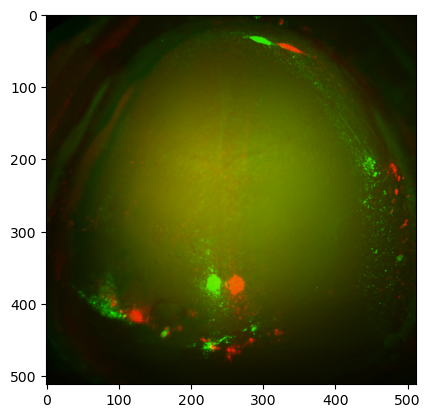

In [10]:
template = series_template.mean(0)
target_avr = series_target.mean(0)

# plo overlapping graph
avr = np.zeros(shape = (512,512,3),dtype = 'u1')
avr[:,:,0]=(template/255).astype('u1')
avr[:,:,1]=(target_avr/255).astype('u1')
plt.imshow(avr)


- Remember, motion correction is highly customized, you need to change parameters as you need.

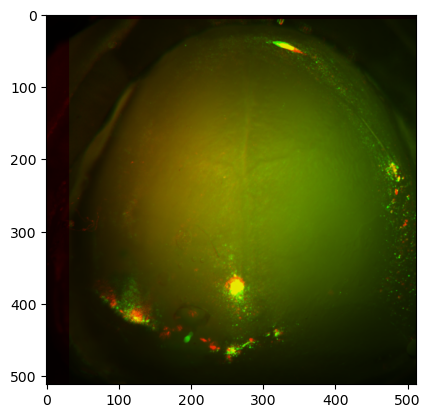

In [18]:
dx,dy,aligned = motion_correction(target=target_avr,template=template,motion_lim=50)

# after align, this graph will fit template.
avr = np.zeros(shape = (512,512,3),dtype = 'u1')
avr[:,:,0]=(template/256).astype('u1')
avr[:,:,1]=(aligned/256).astype('u1')
plt.imshow(avr)



---
- Align all graphs, save them into a new series.

In [23]:
aligned_frame = np.zeros(shape=series_target.shape,dtype='u2')
template = series_template.mean(0)
dxs = np.zeros(len(aligned_frame))
dys = np.zeros(len(aligned_frame))


for i in tqdm(range(len(aligned_frame))):
    c_tar = series_target[i,:,:]
    dxs[i],dys[i],aligned_frame[i,:,:] = motion_correction(target=c_tar,template=template,motion_lim=50)
    


100%|██████████| 3000/3000 [06:04<00:00,  8.24it/s]


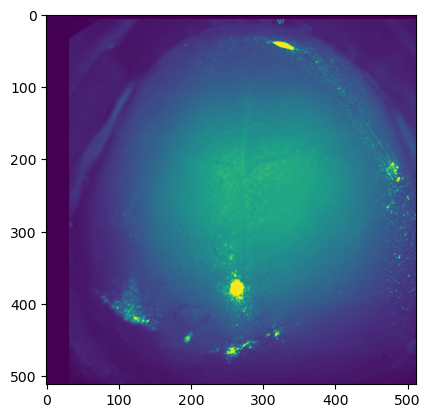

In [24]:
plt.imshow(aligned_frame.mean(0))